# <center> Association Rule Mining </center>

___

Association Rules is an unsupervised technique to unravel any pattern or relation between items. The rule defines association between A and B as A => B i.e if A is purchased B is also purchased. Although, this technique has major use in Market Basket Analysis but it is not the only use case.

The goodness of an association rule is measured based on three primary factors
- Support

If support is very high, it implies that in most of the transactions both A and B are purchased i.e. the rule is clearly evident and trivial. Hence we generally look for low support to extract hidden associations.

- Confidence

If confidence is very high, it implies that when A is purchased then the probability of purchasing B is very high i.e. the rule is strong.

- Lift

If lift is very high, it implies that when B is purchased then the confidence for the rule is very high or most of the times B was purchased along with A i.e. the rule is very strong.

#### Ideally, we look for rules that have low support, high confidence and high lift

We will see apriori algorithm as part of our activity.

___

## Load the libraries

In [1]:
!pip install mlxtend

# mlxtend : Machine learning extensions

In [2]:
import pandas as pd

## Load Data

In [3]:
# Read the transactional dataset

trans = pd.read_csv("Transactions.csv")

trans.head()

,1001,Choclates
0,1001,Pencil
1,1001,Marker
2,1002,Pencil
3,1002,Choclates
4,1003,Pencil


In [4]:
trans = pd.read_csv("Transactions.csv", header = None, 
                    names = ['Id','Items'])

trans.head()

,Id,Items
0,1001,Choclates
1,1001,Pencil
2,1001,Marker
3,1002,Pencil
4,1002,Choclates


Create a transactional matrix

In [5]:
# Now that we discussed what is transactional matrix, try creating such matrix for above data

basket = pd.crosstab(index = trans.Id, columns = trans.Items)
basket

Items,Choclates,Coke,Cookies,Eraser,Marker,Pencil
Id,,,,,,
1001,1,0,0,0,1,1
1002,1,0,0,0,0,1
1003,0,1,0,1,0,1
1004,1,0,1,0,0,1
1005,0,0,0,0,1,0
1006,0,0,0,0,1,1
1007,1,0,0,0,0,1
1008,1,0,1,0,0,1
1009,0,0,0,0,1,1


#### Extract all items and item sets with support >= threshold

Support of a itemset gives the ratio of total transaction that have this itemset.

In [6]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(basket, min_support = 0.2, 
                            use_colnames = True)

frequent_itemsets

,support,itemsets
0,0.5,(Choclates)
1,0.2,(Coke)
2,0.2,(Cookies)
3,0.5,(Marker)
4,0.8,(Pencil)
5,0.2,"(Choclates, Cookies)"
6,0.5,"(Choclates, Pencil)"
7,0.2,"(Cookies, Pencil)"
8,0.3,"(Marker, Pencil)"
9,0.2,"(Choclates, Cookies, Pencil)"


In [7]:
type(frequent_itemsets)

pandas.core.frame.DataFrame

Sort the frequest items based on the support values

In [8]:
frequent_itemsets.sort_values(['support'], ascending = True)

,support,itemsets
1,0.2,(Coke)
2,0.2,(Cookies)
5,0.2,"(Choclates, Cookies)"
7,0.2,"(Cookies, Pencil)"
9,0.2,"(Choclates, Cookies, Pencil)"
8,0.3,"(Marker, Pencil)"
0,0.5,(Choclates)
3,0.5,(Marker)
6,0.5,"(Choclates, Pencil)"
4,0.8,(Pencil)


We can use length property `len` to extract itemsets of a specific length.

In [9]:
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.5,(Choclates),1
1,0.2,(Coke),1
2,0.2,(Cookies),1
3,0.5,(Marker),1
4,0.8,(Pencil),1
5,0.2,"(Choclates, Cookies)",2
6,0.5,"(Choclates, Pencil)",2
7,0.2,"(Cookies, Pencil)",2
8,0.3,"(Marker, Pencil)",2
9,0.2,"(Choclates, Cookies, Pencil)",3


In [10]:
frequent_itemsets[ frequent_itemsets['length'] >= 2 ]

,support,itemsets,length
5,0.2,"(Choclates, Cookies)",2
6,0.5,"(Choclates, Pencil)",2
7,0.2,"(Cookies, Pencil)",2
8,0.3,"(Marker, Pencil)",2
9,0.2,"(Choclates, Cookies, Pencil)",3


#### Association Rules

Let us use the frequent itemset data to extract association rules.

In [11]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric = "lift", 
                          min_threshold = 1.25)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333
1,(Cookies),(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333
4,(Cookies),(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf
5,(Pencil),(Cookies),0.8,0.2,0.2,0.250,1.25,0.04,1.066667
6,"(Choclates, Cookies)",(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf
7,"(Choclates, Pencil)",(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333
8,"(Cookies, Pencil)",(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf
9,(Choclates),"(Cookies, Pencil)",0.5,0.2,0.2,0.400,2.00,0.10,1.333333


$$support(A→C)=support(A∪C),range: [0,1]$$

$$confidence(A→C)=\frac{support(A→C)}{support(A)},range: [0,1]$$

$$lift(A→C)=\frac{confidence(A→C)}{support(C)},range: [0,∞]$$

Leverage is the difference between frequency of item A and B together and expected freq of A and B if they are independent. If 0 then A and B are independent

$$levarage(A→C)=support(A→C)−support(A)×support(C),range: [−1,1]$$

Conviction values close to 0 imply low degree of association and higher values imply dependency (Association)

$$conviction(A→C)=\frac{1−support(C)}{1−confidence(A→C)},range: [0,∞]$$

In [12]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333,1
1,(Cookies),(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf,1
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf,1
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333,1
4,(Cookies),(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf,1
5,(Pencil),(Cookies),0.8,0.2,0.2,0.250,1.25,0.04,1.066667,1
6,"(Choclates, Cookies)",(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf,2
7,"(Choclates, Pencil)",(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333,2
8,"(Cookies, Pencil)",(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf,2
9,(Choclates),"(Cookies, Pencil)",0.5,0.2,0.2,0.400,2.00,0.10,1.333333,1


In [13]:
rules[ (rules['antecedent_len'] >= 2) &
       (rules['confidence'] > 0.75) &
       (rules['lift'] > 1.2) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
6,"(Choclates, Cookies)",(Pencil),0.2,0.8,0.2,1.0,1.25,0.04,inf,2
8,"(Cookies, Pencil)",(Choclates),0.2,0.5,0.2,1.0,2.00,0.10,inf,2


In [14]:
rules.shape

(12, 10)

#### Relationship diagram of rules

Plot the rules on support and confidence

In [15]:
support = rules.support.values
lift = rules.lift.values

In [16]:
support

array([0.2, 0.2, 0.5, 0.5, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])

In [17]:
lift

array([2.  , 2.  , 1.25, 1.25, 1.25, 1.25, 1.25, 2.  , 2.  , 2.  , 2.  ,
       1.25])

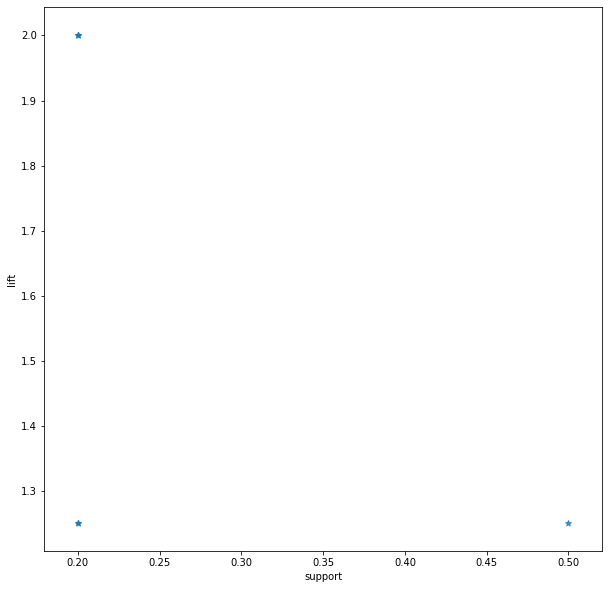

In [18]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 10,10
plt.scatter(support, lift, alpha = 0.5, marker = "*")
plt.xlabel('support')
plt.ylabel('lift') 
plt.show()

In [19]:
x = rules[rules['antecedents'] != frozenset({'Cookies'})]

x.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333,1
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf,1
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333,1
5,(Pencil),(Cookies),0.8,0.2,0.2,0.250,1.25,0.04,1.066667,1
6,"(Choclates, Cookies)",(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf,2


Sort the rules based on support, confidence & lift and understand the insights

In [20]:
x.sort_values(['support', 'confidence', 'lift'], 
              ascending = [True, False, False ])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
8,"(Cookies, Pencil)",(Choclates),0.2,0.5,0.2,1.000,2.00,0.10,inf,2
6,"(Choclates, Cookies)",(Pencil),0.2,0.8,0.2,1.000,1.25,0.04,inf,2
0,(Choclates),(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333,1
7,"(Choclates, Pencil)",(Cookies),0.5,0.2,0.2,0.400,2.00,0.10,1.333333,2
9,(Choclates),"(Cookies, Pencil)",0.5,0.2,0.2,0.400,2.00,0.10,1.333333,1
5,(Pencil),(Cookies),0.8,0.2,0.2,0.250,1.25,0.04,1.066667,1
11,(Pencil),"(Choclates, Cookies)",0.8,0.2,0.2,0.250,1.25,0.04,1.066667,1
2,(Choclates),(Pencil),0.5,0.8,0.5,1.000,1.25,0.10,inf,1
3,(Pencil),(Choclates),0.8,0.5,0.5,0.625,1.25,0.10,1.333333,1


In [21]:
rules.to_csv('MarketBasket_Analysis_Results.csv')

___